In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [2]:
w=32

In [3]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [4]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475305, 32, 16)
strides:  (4096, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x17ed193d040
byteorder:  little
byteswap:  False
type: float64


In [5]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [6]:
np.info(labels)

class:  ndarray
shape:  (475305,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x17f459f8040
byteorder:  little
byteswap:  False
type: float64


In [7]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [8]:
training_sample_labels

380244

In [9]:
training_sample

380244

In [10]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [11]:
train_X.shape

(380244, 32, 15)

In [12]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
#print(train_X)

In [14]:
train_y.shape

(380244,)

In [15]:
#print(test_y)

In [16]:
train_y=train_y.reshape(train_y.shape[0],1)

In [17]:
test_y=test_y.reshape(test_y.shape[0],1)

In [18]:
#print(train_X)

In [19]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380244, 32, 15) (380244, 1) (95061, 32, 15) (95061, 1)


In [20]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    keras.layers.GRU(units=64,return_sequences=True),#,activation='relu'),
    keras.layers.GRU(units=32),#,activation='relu'),
    keras.layers.Dense(units=50,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])

opt=keras.optimizers.SGD(learning_rate=0.9)
model_gru.compile(loss='MSE', optimizer=opt,metrics=['accuracy'])

In [21]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32, 128)           55680     
                                                                 
 gru_1 (GRU)                 (None, 32, 64)            37248     
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 50)                1650      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 104,037
Trainable params: 104,037
Non-trainable params: 0
_________________________________________________________________


In [22]:
 start = t.time()

In [23]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y),batch_size=2048)#, shuffle=False)

Epoch 1/140
186/186 [==============================] - 16s 38ms/step - loss: 0.1891 - accuracy: 0.7393 - val_loss: 0.1954 - val_accuracy: 0.7530
Epoch 2/140
186/186 [==============================] - 6s 30ms/step - loss: 0.1809 - accuracy: 0.7392 - val_loss: 0.1768 - val_accuracy: 0.7530
Epoch 3/140
186/186 [==============================] - 6s 30ms/step - loss: 0.1766 - accuracy: 0.7393 - val_loss: 0.1677 - val_accuracy: 0.7540
Epoch 4/140
186/186 [==============================] - 6s 30ms/step - loss: 0.1736 - accuracy: 0.7390 - val_loss: 0.1734 - val_accuracy: 0.7432
Epoch 5/140
186/186 [==============================] - 6s 30ms/step - loss: 0.1716 - accuracy: 0.7385 - val_loss: 0.1648 - val_accuracy: 0.7530
Epoch 6/140
186/186 [==============================] - 6s 30ms/step - loss: 0.1712 - accuracy: 0.7394 - val_loss: 0.1639 - val_accuracy: 0.7530
Epoch 7/140
186/186 [==============================] - 6s 30ms/step - loss: 0.1700 - accuracy: 0.7392 - val_loss: 0.1626 - val_accuracy

186/186 [==============================] - 6s 30ms/step - loss: 0.1485 - accuracy: 0.7752 - val_loss: 0.1461 - val_accuracy: 0.7770
Epoch 58/140
186/186 [==============================] - 6s 30ms/step - loss: 0.1482 - accuracy: 0.7754 - val_loss: 0.1539 - val_accuracy: 0.7687
Epoch 59/140
186/186 [==============================] - 6s 30ms/step - loss: 0.1481 - accuracy: 0.7757 - val_loss: 0.1470 - val_accuracy: 0.7779
Epoch 60/140
186/186 [==============================] - 6s 30ms/step - loss: 0.1481 - accuracy: 0.7759 - val_loss: 0.1515 - val_accuracy: 0.7775
Epoch 61/140
186/186 [==============================] - 6s 30ms/step - loss: 0.1475 - accuracy: 0.7763 - val_loss: 0.1443 - val_accuracy: 0.7794
Epoch 62/140
186/186 [==============================] - 6s 30ms/step - loss: 0.1474 - accuracy: 0.7767 - val_loss: 0.1448 - val_accuracy: 0.7791
Epoch 63/140
186/186 [==============================] - 6s 30ms/step - loss: 0.1473 - accuracy: 0.7766 - val_loss: 0.1442 - val_accuracy: 0.780

186/186 [==============================] - 6s 30ms/step - loss: 0.1429 - accuracy: 0.7831 - val_loss: 0.1432 - val_accuracy: 0.7831
Epoch 114/140
186/186 [==============================] - 6s 30ms/step - loss: 0.1427 - accuracy: 0.7836 - val_loss: 0.1456 - val_accuracy: 0.7784
Epoch 115/140
186/186 [==============================] - 6s 30ms/step - loss: 0.1427 - accuracy: 0.7836 - val_loss: 0.1469 - val_accuracy: 0.7715
Epoch 116/140
186/186 [==============================] - 6s 30ms/step - loss: 0.1422 - accuracy: 0.7840 - val_loss: 0.1438 - val_accuracy: 0.7816
Epoch 117/140
186/186 [==============================] - 6s 30ms/step - loss: 0.1425 - accuracy: 0.7837 - val_loss: 0.1482 - val_accuracy: 0.7683
Epoch 118/140
186/186 [==============================] - 6s 30ms/step - loss: 0.1423 - accuracy: 0.7843 - val_loss: 0.1458 - val_accuracy: 0.7745
Epoch 119/140
186/186 [==============================] - 6s 30ms/step - loss: 0.1421 - accuracy: 0.7842 - val_loss: 0.1425 - val_accuracy:

In [24]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 21s 7ms/step


In [25]:
stop=t.time()-start
print(stop)

818.2740032672882


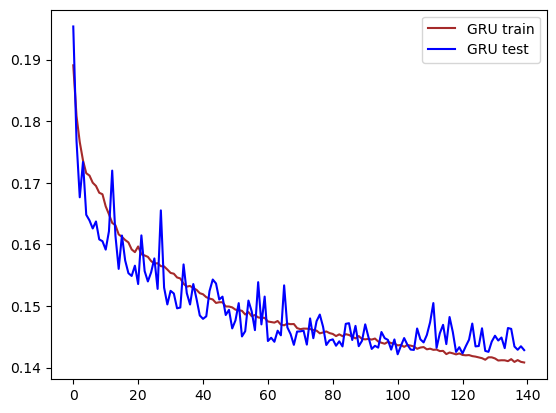

In [26]:
#plt.plot(gru_history.history['accuracy'], label='GRU accuracy', color='green')
#plt.plot(gru_history.history['val_accuracy'], label='GRU val_accuracy', color='yellow')
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

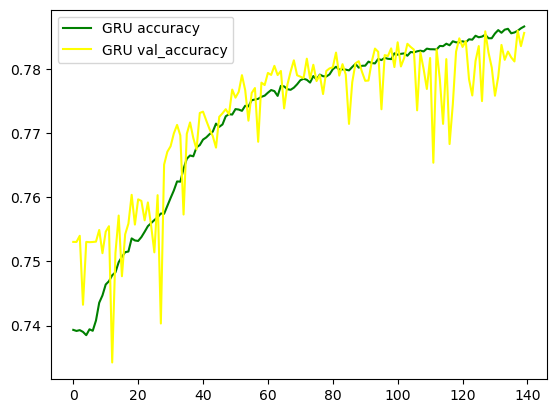

In [27]:
plt.plot(gru_history.history['accuracy'], label='GRU accuracy', color='green')
plt.plot(gru_history.history['val_accuracy'], label='GRU val_accuracy', color='yellow')
plt.legend()
plt.show()

In [28]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [29]:
np.shape(pred_y)

(95061, 1)

In [30]:
pred_y

array([[0.000332  ],
       [0.00098695],
       [0.00042631],
       ...,
       [0.06904726],
       [0.07639466],
       [0.08173739]], dtype=float32)

In [32]:
pred_y=np.reshape(pred_y,95061)

0.14283825894749674
0.23192580395257034
0.3779394911192753
0.27242537010992196


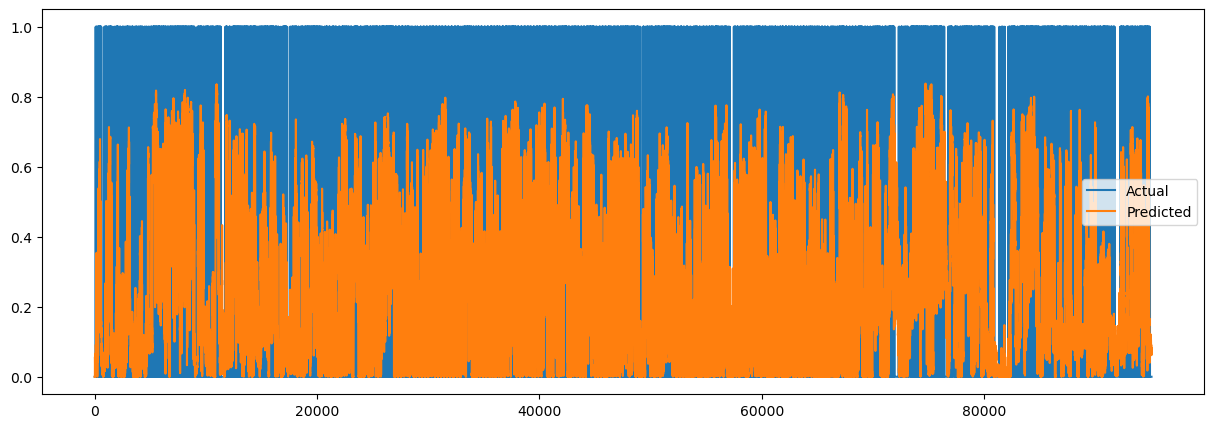

In [33]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [34]:
np.shape(train_X)

(380244, 32, 15)

In [35]:
np.shape(train_y)

(380244, 1)

In [36]:
np.shape(test_X)

(95061, 32, 15)

In [37]:
np.shape(test_y)

(95061, 1)

14854/14854 [==============================] - 97s 7ms/step


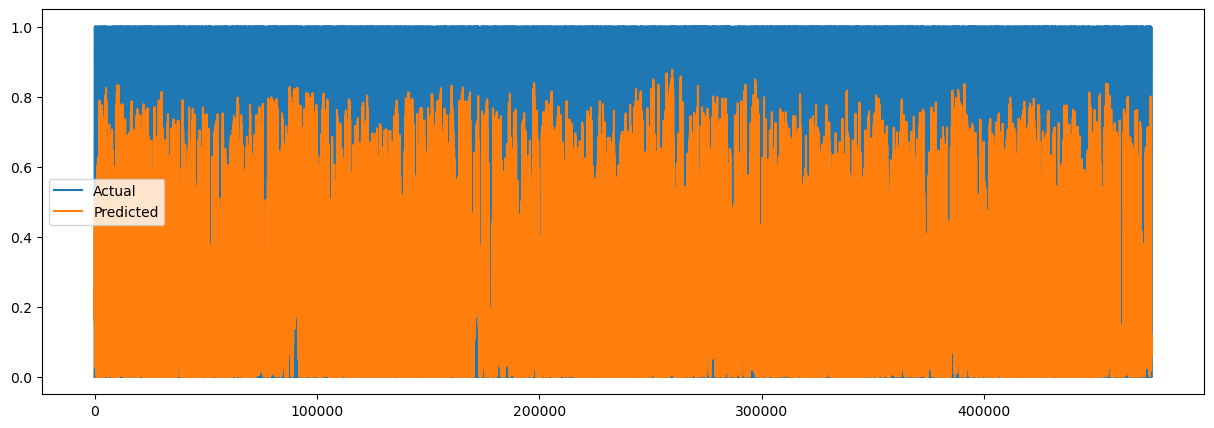

In [38]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

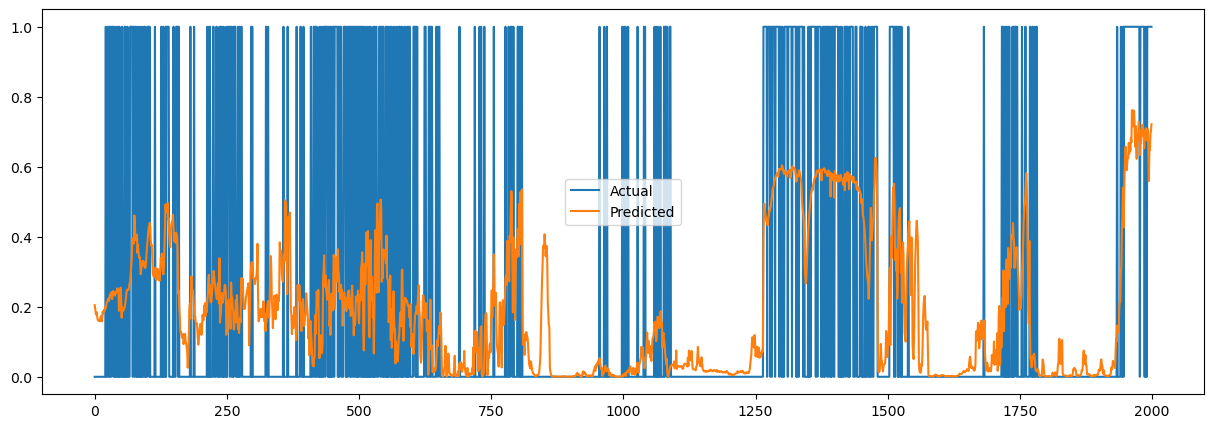

In [39]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [40]:
print(sum(tes)/len(tes))

[0.25795437]


In [41]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.63425272]
[0.81743132]
total acc [0.78685896]


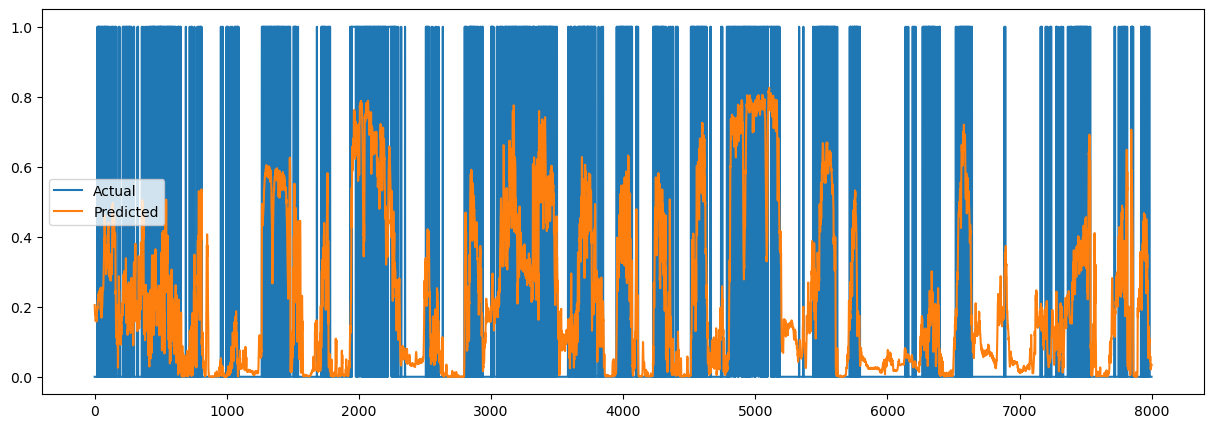

In [42]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

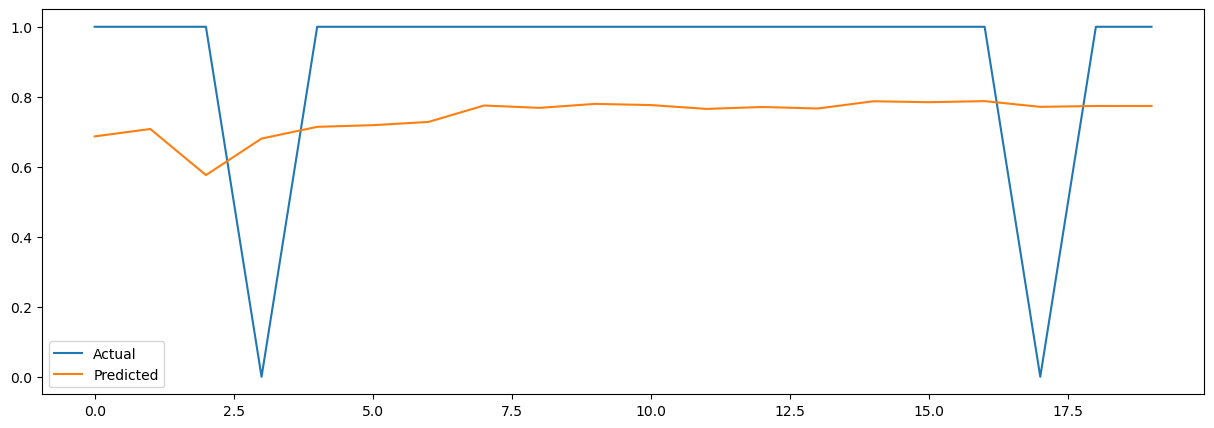

In [43]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

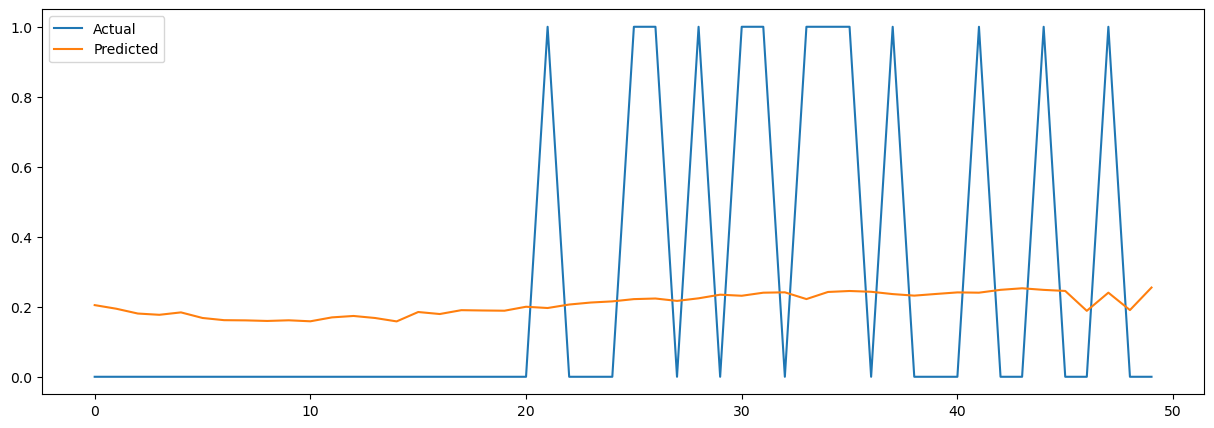

In [44]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

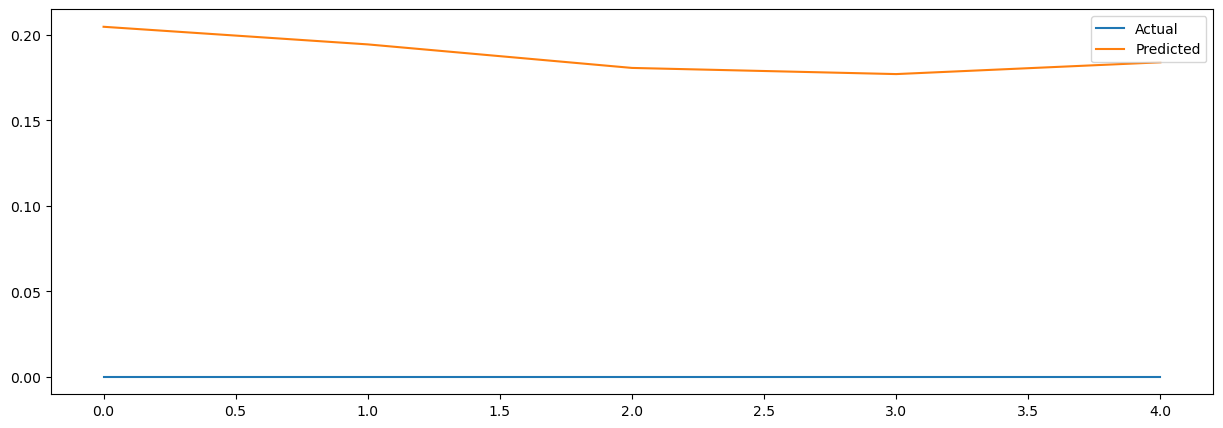

In [45]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

In [46]:
tf.config.experimental.get_memory_info('GPU:0')

{'current': 1097435136, 'peak': 1484154880}